In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

plt.style.use("seaborn-v0_8-notebook")
Number_Of_Simulation = 100000

_**Proposition:**_ Let $U$ ba a $U[0,1]$ random variable. For any continuous distribution function $F$
the random variable $X$ defined by $$X=F^{-1}(U)$$ has distribution $F$. [$F^{-1}$ is defined to be that value of $x$ such that $F(x)=u$]

# Exponential distribution

$x\sim exp(\lambda)$

i.e. $f(x,\lambda) = \lambda e^{-\lambda x}$ for $X\ge 0$ and $0$ otherwise

Let $\lambda = 2$

In [2]:
lam = 2


def Exp_dis(x, lam):  # x +
    return lam * np.exp(-lam * x)

Now, $F(x, \lambda) = 1-e^{-\lambda x}$

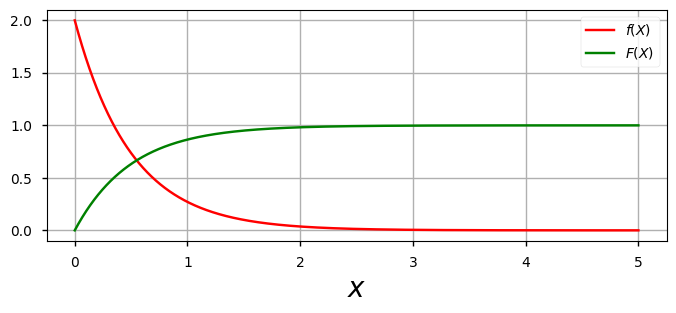

In [3]:
def CDF_Exp(x, lam):
    return 1 - np.exp(-lam * x)


x = np.linspace(0, 5, 10000)
plt.figure(figsize=(8, 3))
plt.plot(x, Exp_dis(x, lam), "red", label="$f(X)$")
plt.plot(x, CDF_Exp(x, lam), "green", label="$F(X)$")
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.grid()
plt.show()

now, $F^{-1}(y) = - \frac{\ln(1-y)}{\lambda}$
if $y \sim U(0,1)$ then also, $1-y \sim U(0,1)$.

Then $F^{-1}(y) = - \frac{\ln(y)}{\lambda}$ will also work for easy simulation.

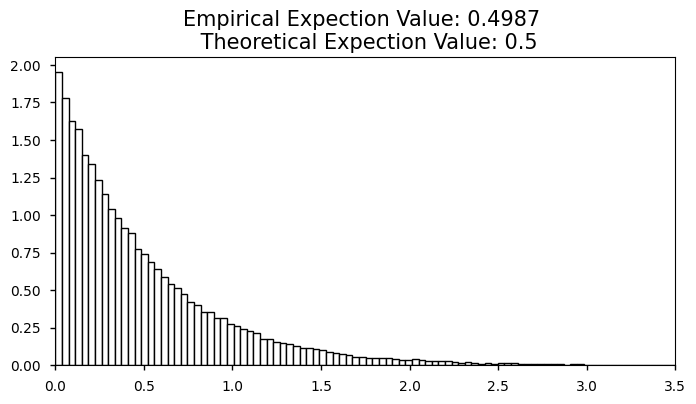

In [4]:
def INV_CDF_Exp(y, lam):
    return - np.divide(np.log(y), lam)


Us = np.random.uniform(size=Number_Of_Simulation)
random_exp_varable = INV_CDF_Exp(Us, lam)

exp_exptcion = sum(random_exp_varable) / len(random_exp_varable)

plt.figure(figsize=(8, 4))
# plt.plot(x, Exp_dis(x, lam), color="red", label="$f(X)$")
plt.hist(
    random_exp_varable,
    color='white',
    #    histtype="step",
    linewidth=1,
    density="norm",
    edgecolor="black",
    bins=150,
    label="$F^{-1}(u)$",
)
# plt.legend()
# plt.grid()
plt.title(
    f"Empirical Expection Value: {exp_exptcion:.4f} \n Theoretical Expection Value: {1/lam}",
    fontsize=15,
)
# plt.grid()
plt.xlim([0, 3.5])
plt.show()

# Gamma distribution

$Y\sim G(n,\lambda)$

To generate $Y$, first we generate $x_i \sim exp(\lambda)$ then $Y=\sum_1^n x_i\sim G(n, \lambda)$

we take $\lambda = 5$ and $n=10$

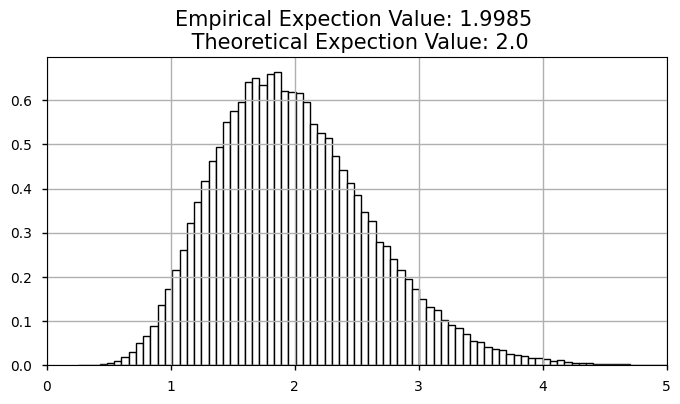

In [6]:
LAM = 5
N = 10


def Gamma_dis(x, n, lam):
    return lam**n * x ** (n - 1) * np.exp(-lam * x) / float(math.factorial(n - 1))


def Gamma_RV(n, lam):
    Us = np.random.uniform(size=n)
    Exp_rv = -np.log(Us) / lam
    return Exp_rv.sum()


Gamma_variabels = []
for _ in range(Number_Of_Simulation):
    Gamma_variabels.append(Gamma_RV(N, LAM))

gamma_expection = sum(Gamma_variabels) / len(Gamma_variabels)

x = np.linspace(0, 6, 100000)
plt.figure(figsize=(8, 4))
# plt.plot(x, Gamma_dis(x, N, LAM), color="red", label="$f(x)$")
plt.hist(
    Gamma_variabels,
    color='white',
    edgecolor="black",
    density="norm",
    linewidth=1,
    bins=100,
    label="$Gamma$",
)
# plt.legend()
plt.grid()
plt.title(
    f"Empirical Expection Value: {gamma_expection:.4f} \n Theoretical Expection Value: {N/LAM}",
    fontsize=15,
)
plt.xlim([0, 5])
plt.show()

# Standard Normal Distribution

if $X\sim N(0,1)$
Then,
$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

## Accept–Reject Method

Taking *envelope density* $g(x)$ as standred exponential distribution then $c= \sqrt{\frac{2e}{\pi}}$

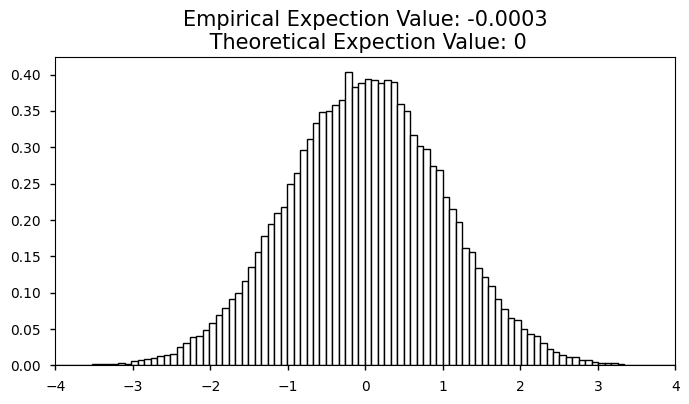

In [7]:
def inverse_exp_cdf(y):
    return -np.log(y)


std_normal_rvs = []

for _ in range(Number_Of_Simulation):
    u1 = np.random.uniform()
    u2 = np.random.uniform()
    y1 = inverse_exp_cdf(u1)
    y2 = inverse_exp_cdf(u2)
    if y2 >= ((y1 - 1) ** 2) / 2:
        if np.random.uniform() <= 1 / 2:
            std_normal_rvs.append(y1)
        else:
            std_normal_rvs.append(-y1)


plt.figure(figsize=(8, 4))
plt.hist(
    std_normal_rvs,
    linewidth=1,
    density=True,
    color='white',
    edgecolor="black",
    bins=100,
)
plt.title(
    f"Empirical Expection Value: {statistics.mean(std_normal_rvs):.4f}\n Theoretical Expection Value: 0",
    fontsize=15,
)
plt.xlim([-4, 4])
plt.show()

# Beta Distribution

By Accept–Reject method taking $g(x)=1$ and $c=\sup_x f(x)$

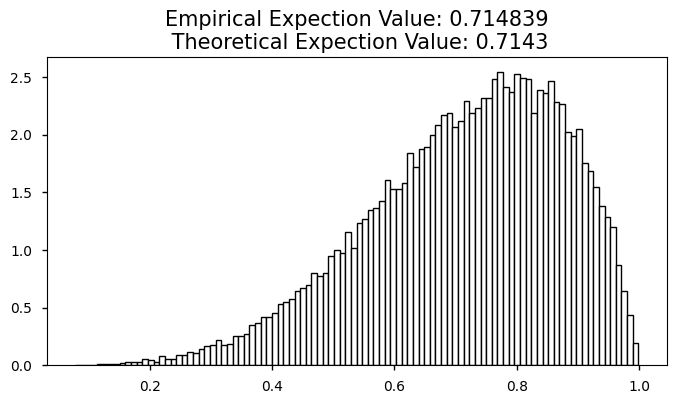

In [8]:
def Beta_RV(alpha, beta, Number_Of_Simulation):
    Beta_RVs = []
    for _ in range(Number_Of_Simulation):
        u = np.random.uniform()
        x = np.random.uniform()
        if u <= (
            x ** (alpha - 1)
            * (1 - x) ** (beta - 1)
            * (alpha + beta - 2) ** (alpha + beta - 2)
        ) / ((alpha - 1) ** (alpha - 1) * (beta - 1) ** (beta - 1)):
            Beta_RVs.append(x)
    return Beta_RVs


alpha = 5
beta = 2
Beta_Rvs = Beta_RV(alpha, beta, Number_Of_Simulation)
plt.figure(figsize=(8, 4))
plt.hist(
    Beta_Rvs,
    linewidth=1,
    density=True,
    color='white',
    edgecolor="black",
    bins=100,
)

plt.title(
    f"Empirical Expection Value: {statistics.mean(Beta_Rvs):4f}\n Theoretical Expection Value: {alpha/(alpha+beta):.4f}",
    fontsize=15,
)
plt.show()